In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [46]:
data = pd.read_csv("input/train.csv")

In [47]:
print(data.describe())
data.head()

              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312890      4.633819   
min        0.0      0.0      0

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [48]:
X,Y = data.drop('label',axis = 1),data['label']
X = X/255.0

In [49]:
X = np.array(X).reshape(X.shape[0],28,28)
Y = keras.utils.to_categorical(Y,num_classes = 10)

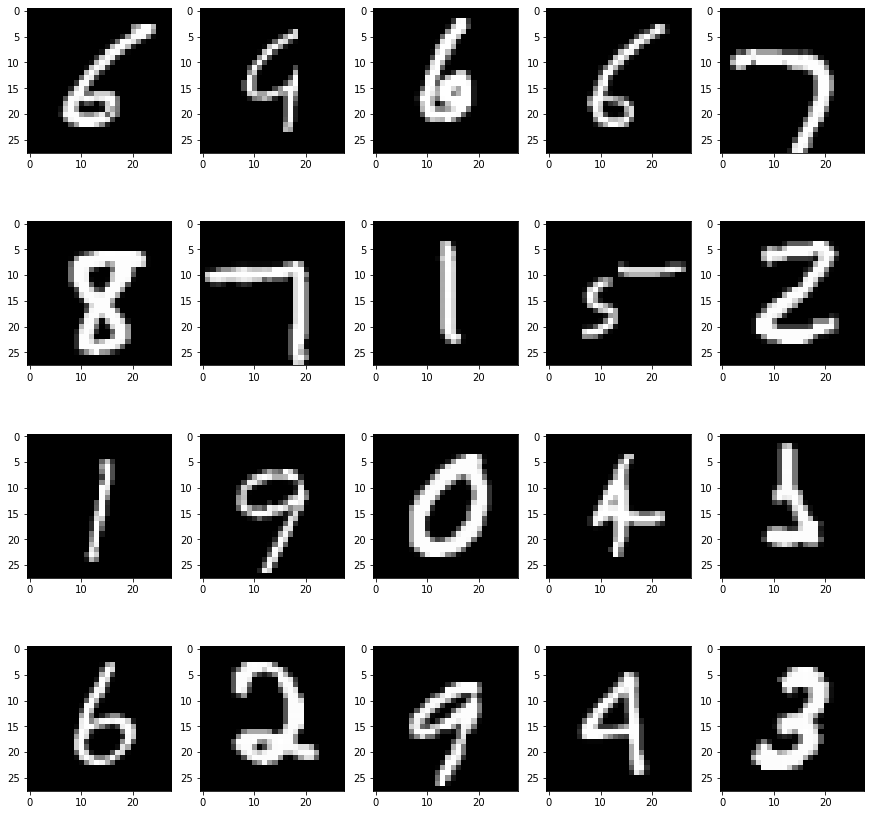

In [50]:
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 4
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    loc = random.randint(0,len(X)-1)
    plt.imshow(X[loc],cmap = 'gray')
plt.show()

In [51]:
X = X.reshape(-1,28,28,1)

In [52]:
Xtrain, xval, Ytrain, yval = train_test_split(X,Y,test_size = 0.22)

In [53]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',
                              activation = 'relu',input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(filters = 64,kernel_size = (5,5),
                              activation = 'relu'))

model.add(keras.layers.MaxPooling2D((2,2),strides = (1,1),padding = 'same'))

model.add(keras.layers.Conv2D(filters = 32,kernel_size = (3,3),
                             activation = 'relu',padding = 'same'))
model.add(keras.layers.Conv2D(filters = 32,kernel_size = (3,3),
                             activation = 'relu'))

model.add(keras.layers.MaxPooling2D((2,2),padding = 'same'))

model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10,activation = 'softmax'))

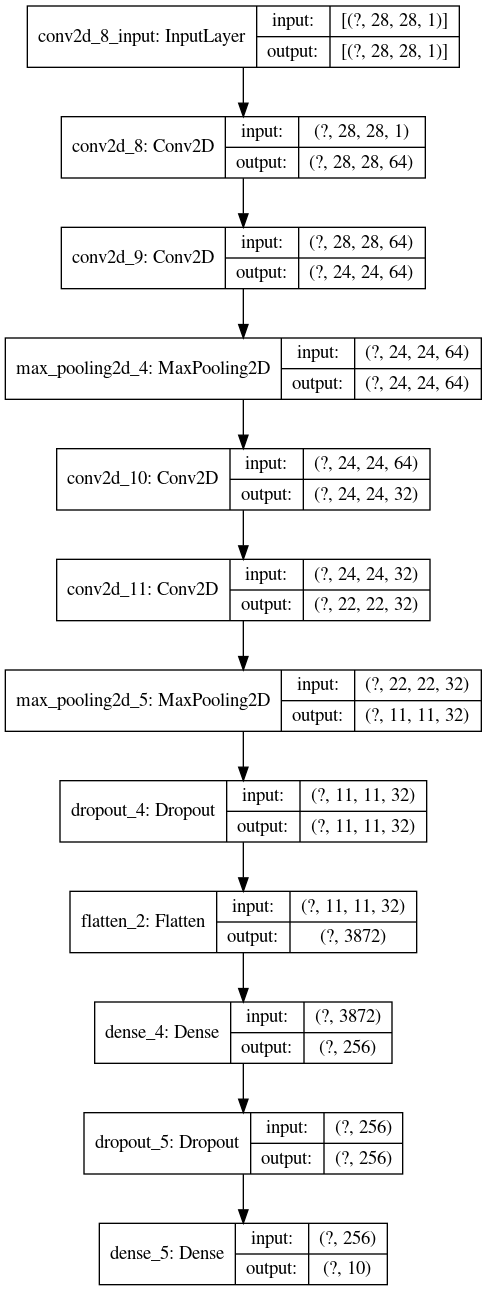

In [54]:
keras.utils.plot_model(model,to_file = 'model.png',show_shapes = True)

In [55]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [56]:
history = model.fit(Xtrain, Ytrain, epochs = 50, batch_size = 32, validation_data = (xval, yval))

Epoch 1/50
1024/1024 [==============================] - 6s 6ms/step - loss: 0.1919 - accuracy: 0.9410 - val_loss: 0.0695 - val_accuracy: 0.9785
Epoch 2/50
1024/1024 [==============================] - 6s 6ms/step - loss: 0.0735 - accuracy: 0.9787 - val_loss: 0.0612 - val_accuracy: 0.9806
Epoch 3/50
1024/1024 [==============================] - 6s 5ms/step - loss: 0.0544 - accuracy: 0.9836 - val_loss: 0.0434 - val_accuracy: 0.9874
Epoch 4/50
1024/1024 [==============================] - 6s 6ms/step - loss: 0.0435 - accuracy: 0.9863 - val_loss: 0.0380 - val_accuracy: 0.9886
Epoch 5/50
1024/1024 [==============================] - 6s 6ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 0.0423 - val_accuracy: 0.9887
Epoch 6/50
1024/1024 [==============================] - 6s 5ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0428 - val_accuracy: 0.9882
Epoch 7/50
1024/1024 [==============================] - 6s 6ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0438 - val_accuracy:

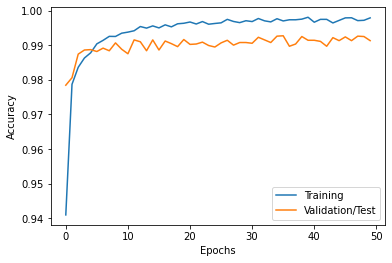

In [57]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(train_acc,label = "Training")
plt.plot(val_acc,label = 'Validation/Test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

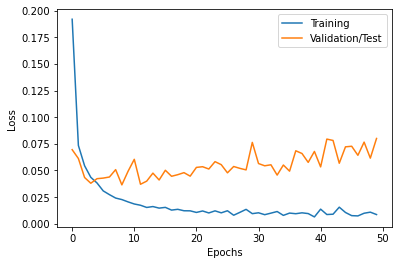

In [58]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label = 'Training')
plt.plot(val_loss,label = 'Validation/Test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [59]:
test_data = pd.read_csv("input/test.csv")
test_data = test_data/255.0
test_data = np.array(test_data).reshape(test_data.shape[0],28,28)
test_data = test_data.reshape(-1,28,28,1)

In [60]:
prediction = model.predict(test_data)

In [61]:
decoded_preds = np.argmax(prediction,axis = 1)

In [62]:
submissions = pd.read_csv("input/sample_submission.csv")
submissions['Label'] = np.array(decoded_preds)

In [63]:
submissions.to_csv('submissions.csv')